In [38]:
import pandas as pd
import numpy as np
import random
from scipy.stats import t
import seaborn as sns

In [39]:
data = pd.read_csv("Group5.csv")

# Compute the covariance between three variables
print(data.cov())

            S1          S2          S3
S1  355.498034   54.396253    9.307425
S2   54.396253  274.075642  160.689105
S3    9.307425  160.689105  905.634976


Text(0.5, 1.0, 'Correlation Heatmap')

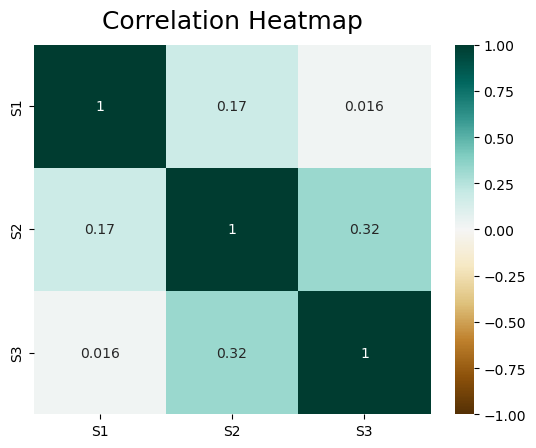

In [49]:
# Compute the correlation coefficients between three variables
# Plot and report the relationships between the variables
heatmap = sns.heatmap(data.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

In [41]:
# Generate a random sample of 50 observations for each sensor
# sample = np.array(random.sample(list(data["S1"]),  20))

sample_S1 = np.array(random.choices(data["S1"], k = 50))
sample_S2 = np.array(random.choices(data["S2"], k = 50))
sample_S3 = np.array(random.choices(data["S3"], k = 50))

sample = data.sample(n=50, random_state=1)

In [42]:
m = list(sample.mean())
print(m)
s = list(sample.std())
print(s)

dof = len(sample)-1 
print(dof)

confidence = [0.90, 0.95, 0.99]

t_crit = list(np.abs(t.ppf((1-np.array(confidence))/2,dof)))
print(t_crit)

confidence_interval = {}
for j in range(0,len(m)):
    for i in confidence:
        left_bound = m[j] - s[j]*t_crit[confidence.index(i)]/np.sqrt(len(sample))
        right_bound = m[j] + s[j]*t_crit[confidence.index(i)]/np.sqrt(len(sample))

        interval = [left_bound, right_bound]
        key = "S{}_{}".format(j+1, int(i*100))
        confidence_interval[key] = interval

confidence_interval


[482.04, 374.94, 348.28]
[17.325173380173176, 15.76926745027705, 30.824082819001333]
49
[1.6765508919142635, 2.009575234489209, 2.67995197363155]


{'S1_90': [477.9321996428379, 486.14780035716217],
 'S1_95': [477.11624021090495, 486.9637597890951],
 'S1_99': [475.4737169676422, 488.60628303235785],
 'S2_90': [371.2011050958622, 378.6788949041378],
 'S2_95': [370.45842378304764, 379.42157621695236],
 'S2_99': [368.9634091157804, 380.9165908842196],
 'S3_90': [340.97160685237407, 355.5883931476259],
 'S3_95': [339.51989260080825, 357.0401073991917],
 'S3_99': [336.59759731570557, 359.9624026842944]}

In [43]:
# Compare the population means of each sample with the estimated one given the samples
data.mean()

S1    483.424242
S2    375.590909
S3    351.727273
dtype: float64